# Data cleaning


**STEPS:**
1. Download the 5 small datasets (resized version) and combine them into 1 folder (combined_set).
2. Split the dataset for training, validation, and testing in 80:10:10 ratio.
3. Show class distribution.
4. Show graph for the training set class distribution.

*Date executed: April 06, 2023*

----

In [1]:
import os
import random
import shutil
import matplotlib.pyplot as plt

## Split the dataset to 80:10:10 ratio.
The `train` dataset contains 80% of the dataset, while `test` and `valid` contains 10% each.

In [2]:
# Set the paths for your dataset
# data_path = r"C:\Users\sheil\OneDrive\Documents\Craus\resized\resized_set"
data_path = r"C:\Users\sheil\OneDrive\Documents\Craus\combined_set"
images_path = os.path.join(data_path, 'images')
labels_path = os.path.join(data_path, 'labels')

# Set the paths for your new train/valid/test folders
train_path = os.path.join(data_path, 'train')
valid_path = os.path.join(data_path, 'valid')
test_path = os.path.join(data_path, 'test')

# Set the names for the sub-folders
images_folder = 'images'
labels_folder = 'labels'

# Set the ratios for train/valid/test
train_ratio = 0.8
valid_ratio = 0.1
test_ratio = 0.1

# Create the new folders if they don't exist
os.makedirs(train_path, exist_ok=True)
os.makedirs(os.path.join(train_path, images_folder), exist_ok=True)
os.makedirs(os.path.join(train_path, labels_folder), exist_ok=True)

os.makedirs(valid_path, exist_ok=True)
os.makedirs(os.path.join(valid_path, images_folder), exist_ok=True)
os.makedirs(os.path.join(valid_path, labels_folder), exist_ok=True)

os.makedirs(test_path, exist_ok=True)
os.makedirs(os.path.join(test_path, images_folder), exist_ok=True)
os.makedirs(os.path.join(test_path, labels_folder), exist_ok=True)

# Get the list of image filenames
image_filenames = [f for f in os.listdir(images_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Shuffle the image filenames randomly
random.shuffle(image_filenames)

# Calculate the split points for train/valid/test
train_split = int(len(image_filenames) * train_ratio)
valid_split = int(len(image_filenames) * (train_ratio + valid_ratio))

# Move the images and labels to the corresponding folders
for i, image_filename in enumerate(image_filenames):
    src_image_path = os.path.join(images_path, image_filename)
    src_label_path = os.path.join(labels_path, image_filename.replace(os.path.splitext(image_filename)[1], '.txt'))
    
    if i < train_split:
        dst_image_path = os.path.join(train_path, images_folder, image_filename)
        dst_label_path = os.path.join(train_path, labels_folder, image_filename.replace(os.path.splitext(image_filename)[1], '.txt'))
    elif i < valid_split:
        dst_image_path = os.path.join(valid_path, images_folder, image_filename)
        dst_label_path = os.path.join(valid_path, labels_folder, image_filename.replace(os.path.splitext(image_filename)[1], '.txt'))
    else:
        dst_image_path = os.path.join(test_path, images_folder, image_filename)
        dst_label_path = os.path.join(test_path, labels_folder, image_filename.replace(os.path.splitext(image_filename)[1], '.txt'))
    
    shutil.copy(src_image_path, dst_image_path)
    shutil.copy(src_label_path, dst_label_path)


Display the number of images in training, validation, and testing sets.

In [3]:
# Set the subfolder paths for images and labels
train_images_path = os.path.join(train_path, 'images')
valid_images_path = os.path.join(valid_path, 'images')
test_images_path  = os.path.join(test_path, 'images')

# Print the number of images in each folder
train_size = len(os.listdir(train_images_path))
valid_size = len(os.listdir(valid_images_path))
test_size = len(os.listdir(test_images_path))

print(f'Training set   = {train_size} images')
print(f'Validation set = {valid_size} images')
print(f'Testing set    = {test_size} images')
print(f'—————————————————————————————————')
print(f'Total images   = {train_size + valid_size + test_size} images')

Training set   = 25320 images
Validation set = 3165 images
Testing set    = 3165 images
—————————————————————————————————
Total images   = 31650 images


## Class distribution
Show how many annotations each class have.
* Class 0 = `not_covered`
* Class 1 = `fully_covered`
* Class 2 = `partially_covered`


In [4]:
# Label folder path
# train   = r"C:\Users\sheil\OneDrive\Documents\Craus\resized\resized_set\train\labels"
train = os.path.join(data_path, 'train', 'labels')
# valid   = r"C:\Users\sheil\OneDrive\Documents\Craus\resized\resized_set\valid\labels"
valid = os.path.join(data_path, 'valid', 'labels')
# test    = r"C:\Users\sheil\OneDrive\Documents\Craus\resized\resized_set\test\labels"
test = os.path.join(data_path, 'test', 'labels')

# Counters
ctr = total_imgs = class0_annotations = class1_annotations = class2_annotations = total_annotations = 0

def read_text_file(file_path):
    ctr_0 = ctr_1 = ctr_2 = 0

    with open(file_path, 'r') as fr:
        lines = fr.readlines()

        with open(file_path, 'w') as fw:
            for line in lines:
                if line.startswith('0'):
                    ctr_0 = ctr_0 + 1
                elif line.startswith('1'):
                    ctr_1 = ctr_1 + 1
                elif line.startswith('2'):
                    ctr_2 = ctr_2 + 1
    return [ctr_0, ctr_1, ctr_2]
            
            
for path in [train, valid, test]:       
    os.chdir(path)
    bbox_0 = bbox_1 = bbox_2 = 0

    print(f'\n🚀 Reading {path}\n...')

    for file in os.listdir():
        if file.endswith(".txt"):
            img_ctr = read_text_file(f'{path}/{file}')
            bbox_0   += img_ctr[0]
            bbox_1   += img_ctr[1]
            bbox_2   += img_ctr[2]
            ctr      += 1
    
    total_boxes = bbox_0 + bbox_1 + bbox_2

    # Display the summary per path (train, val, and test)
    print("======================== Summary ========================")
    print(f' Class 0 - not_covered       = {bbox_0} bbox {round(bbox_0/total_boxes * 100, 2)}%')
    print(f' Class 1 - fully_covered     = {bbox_1} bbox {round(bbox_1/total_boxes * 100, 2)}%')
    print(f' Class 2 - partially_covered = {bbox_2} bbox {round(bbox_2/total_boxes * 100, 2)}%')
    print(f' Total bounding boxes        = {total_boxes}')
    print(f'\n🎉 Done! There are {ctr} files changed in {path} folder!')
    print("=========================================================\n")

    total_imgs           += ctr
    class0_annotations   += bbox_0
    class1_annotations   += bbox_1
    class2_annotations   += bbox_2
    total_annotations    += total_boxes
    ctr                  = 0


🚀 Reading C:\Users\sheil\OneDrive\Documents\Craus\combined_set\train\labels
...
======================== Summary ========================
 Class 0 - not_covered       = 12993 bbox 30.41%
 Class 1 - fully_covered     = 13799 bbox 32.29%
 Class 2 - partially_covered = 15936 bbox 37.3%
 Total bounding boxes        = 42728

🎉 Done! There are 25320 files changed in C:\Users\sheil\OneDrive\Documents\Craus\combined_set\train\labels folder!


🚀 Reading C:\Users\sheil\OneDrive\Documents\Craus\combined_set\valid\labels
...
======================== Summary ========================
 Class 0 - not_covered       = 1746 bbox 32.52%
 Class 1 - fully_covered     = 1683 bbox 31.35%
 Class 2 - partially_covered = 1940 bbox 36.13%
 Total bounding boxes        = 5369

🎉 Done! There are 3165 files changed in C:\Users\sheil\OneDrive\Documents\Craus\combined_set\valid\labels folder!


🚀 Reading C:\Users\sheil\OneDrive\Documents\Craus\combined_set\test\labels
...
======================== Summary =============

Display the total number of annotations of each class in each sets.

In [5]:
# Display the overall summary
print("——————————————————————————————— OVERALL SUMMARY ———————————————————————————————")
print(f' Total Images          = {total_imgs}')
print(f' Total Bounding boxes  = {total_annotations}')
print(f' Total Bbox of Class 0 = {class0_annotations} (not_covered)       - {round(class0_annotations/total_annotations * 100, 2)}%')
print(f' Total Bbox of Class 1 = {class1_annotations} (fully_covered)     - {round(class1_annotations/total_annotations * 100, 2)}%')
print(f' Total Bbox of Class 2 = {class2_annotations} (partially_covered) - {round(class2_annotations/total_annotations * 100, 2)}%')
print("———————————————————————————————————————————————————————————————————————————————")

——————————————————————————————— OVERALL SUMMARY ———————————————————————————————
 Total Images          = 31650
 Total Bounding boxes  = 53395
 Total Bbox of Class 0 = 16372 (not_covered)       - 30.66%
 Total Bbox of Class 1 = 17199 (fully_covered)     - 32.21%
 Total Bbox of Class 2 = 19824 (partially_covered) - 37.13%
———————————————————————————————————————————————————————————————————————————————


## Class balance report for the `train` set
Show a graph describing how each class was represented in the `train` dataset.

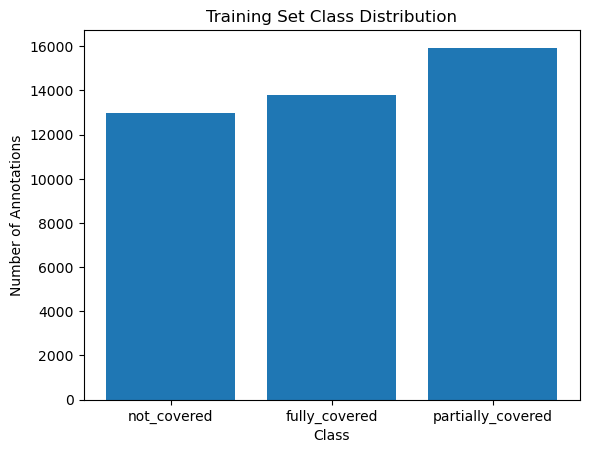

In [12]:
# Define class labels and the number of annotations/bounding boxes
labels = ['not_covered', 'fully_covered', 'partially_covered']
bbox_counts = [12993, 13799, 15936] # training set

# Create a bar graph
plt.bar(labels, bbox_counts)

# Add a title and axis labels
plt.title('Training Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Annotations')

# Display the graph
plt.show()

**🚀 Conclusion: We can see that the percentages are not exactly the same for each class, but they are relatively close. Therefore, we can say that the class distribution is somewhat balanced, with no class dominating the distribution.**

------
